<img src="https://bdaaosu.org/img/Logo.png" width="60%"/>

# Text Classification Workshop

<div>
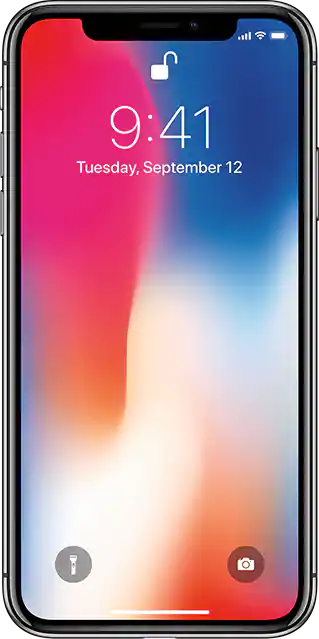
</div>

<img src="https://media.istockphoto.com/photos/shocked-sloppy-clumsy-bearded-man-dropping-mobile-phone-falling-on-picture-id950784038" width="25%" style="float:left;">

<img src="https://www.squaretrade.com/go/static/img/content-pages/cracked-iphone.png?h=0.103.0" width="22%" style="float:left;margin-left:-20px"/>

In [ ]:
# Helper functions
def most_associated_words(tfidf, features, labels):
    from sklearn.feature_selection import chi2
    import numpy as np
    N = 5
    for cond in list(set(labels)):
      features_chi2 = chi2(features, labels == cond)
      indices = np.argsort(features_chi2[0])
      feature_names = np.array(tfidf.get_feature_names())[indices]
      unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
      bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
      #trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
      print("# '{}':".format(cond))
      print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
      print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
      #print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))
      print('\n')

In [18]:
from text_compiler import combine_crowdsourced_classifications

combine_crowdsourced_classifications()

In [78]:
import pandas as pd

## How important is each word in determining a class?

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer( 
    lowercase=True, # Make every word in our documents lowercase
    stop_words='english' # Remove common words like "a", "is", "they", "with", etc.
)

t0 = pd.DataFrame(
    {
        'Description': ['Perfectly cooked and seasoned','Illustrious and a symbol of strength']
    }
)

features = tfidf.fit_transform(t0.Description).toarray()

print(
    pd.DataFrame(
        features, 
        columns = tfidf.get_feature_names()
    )
)

    cooked  illustrious  perfectly  seasoned  strength   symbol
0  0.57735      0.00000    0.57735   0.57735   0.00000  0.00000
1  0.00000      0.57735    0.00000   0.00000   0.57735  0.57735


In [81]:
import numpy as np
num_documents = 2
num_words = 3
term_frequency = 1/num_words
inverse_document_frequency = np.log(num_documents/1)+1

tf_idf = (1/3)*(np.log(2)+1)
print(tf_idf)

0.5643823935199818


In [25]:
descriptions = pd.read_csv('https://bdaa-text-workshop.s3.amazonaws.com/iPhone+Listing+Descriptions.csv')

In [76]:
# Distribution of classes
descriptions.Condition.value_counts()

AttributeError: 'Series' object has no attribute 'plt'

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=.05, 
    lowercase=True,
    ngram_range=(1, 2), # Consider both one word and two word combinations
    stop_words='english'
)
features = tfidf.fit_transform(descriptions.ItemDescription).toarray()
labels = descriptions.Condition
features.shape

(310, 132)

In [28]:

most_associated_words(tfidf, features, labels)

# '0':
  . Most correlated unigrams:
. selling
. bad
. sold
. locked
. parts
  . Most correlated bigrams:
. scratches wear
. bad esn
. parts repair
. sold parts
. icloud locked


# '1':
  . Most correlated unigrams:
. spot
. exact
. following
. damaged
. cracked
  . Most correlated bigrams:
. right corner
. issues device
. device device
. read description
. cracked screen


# '2':
  . Most correlated unigrams:
. casing
. scratching
. small
. fair
. noticeable
  . Most correlated bigrams:
. does affect
. phone charger
. condition scratches
. fair condition
. working condition


# '3':
  . Most correlated unigrams:
. minor
. usage
. cracked
. major
. parts
  . Most correlated bigrams:
. icloud lock
. good condition
. functional unit
. imei icloud
. cracked screen


# '4':
  . Most correlated unigrams:
. excellent
. open
. box
. accessories
. mint
  . Most correlated bigrams:
. comes original
. box accessories
. excellent condition
. 10 10
. mint condition


# '5':
  . Most correlated uni

### Okay, _cool_, so now we have a huge matrix. 
### So, how do we use it to make classifications?

# What the f@!k is Multinomial Naive Bayes?

## Enter Bayes Rule
<img src="https://miro.medium.com/max/512/0*EfYTXtTJ9X-Ua9Nh.png" />

## From our first (small) example
<img src="https://i.imgur.com/WnKCeD3.png" width="80%"/>

## Food or not food?
<img src="https://i.imgur.com/a83Evsd.png" width="55%"/>

##

In [ ]:
iphone_listings = 